time series starts 2000-01-03
time series ends   2011-12-30


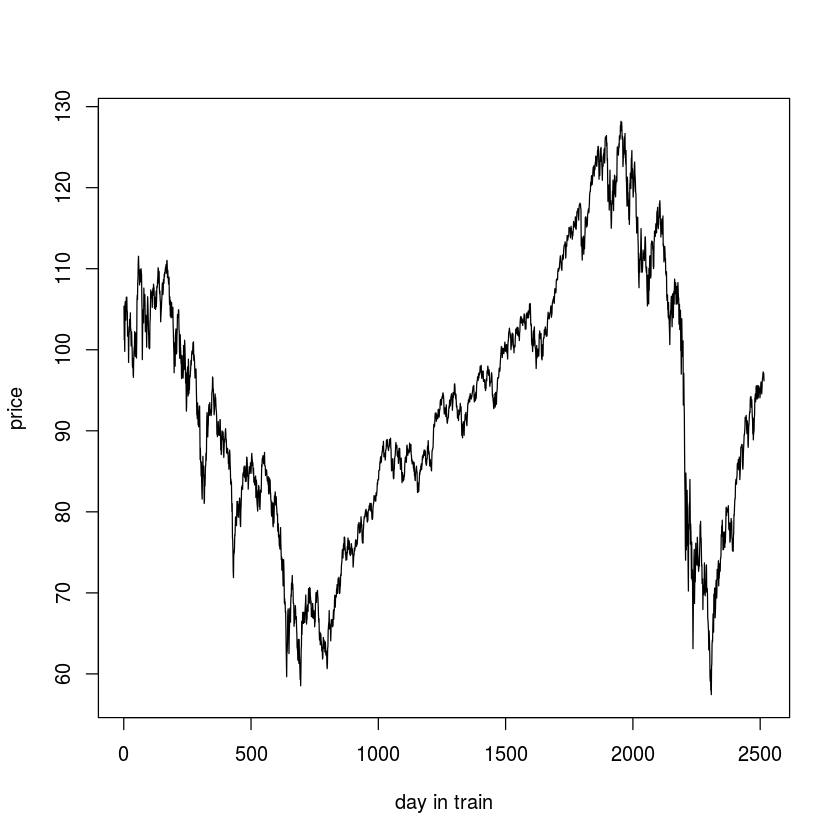

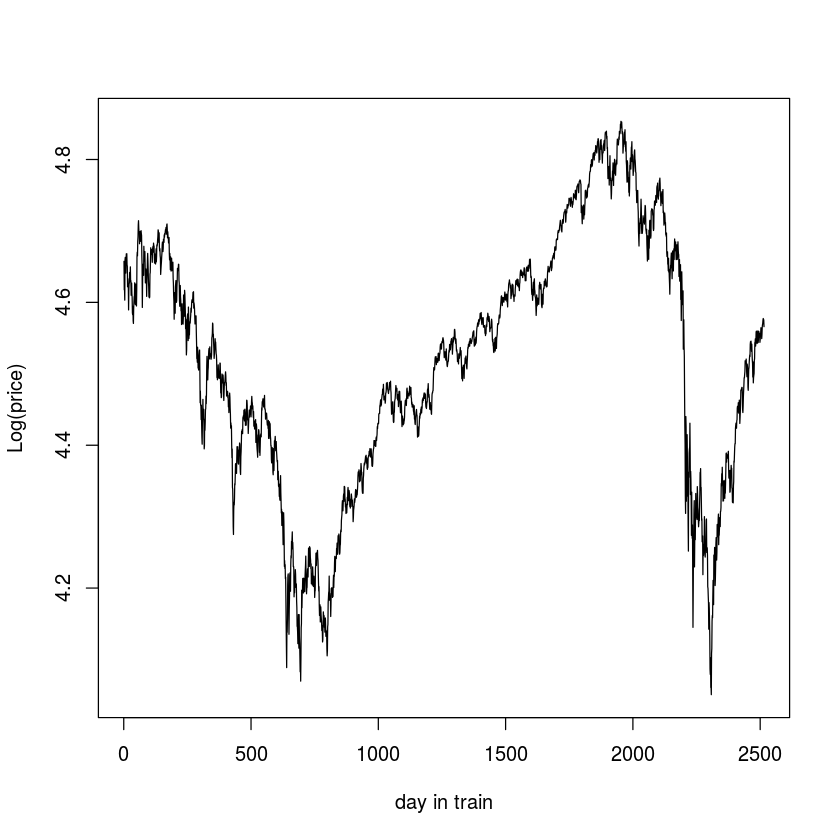

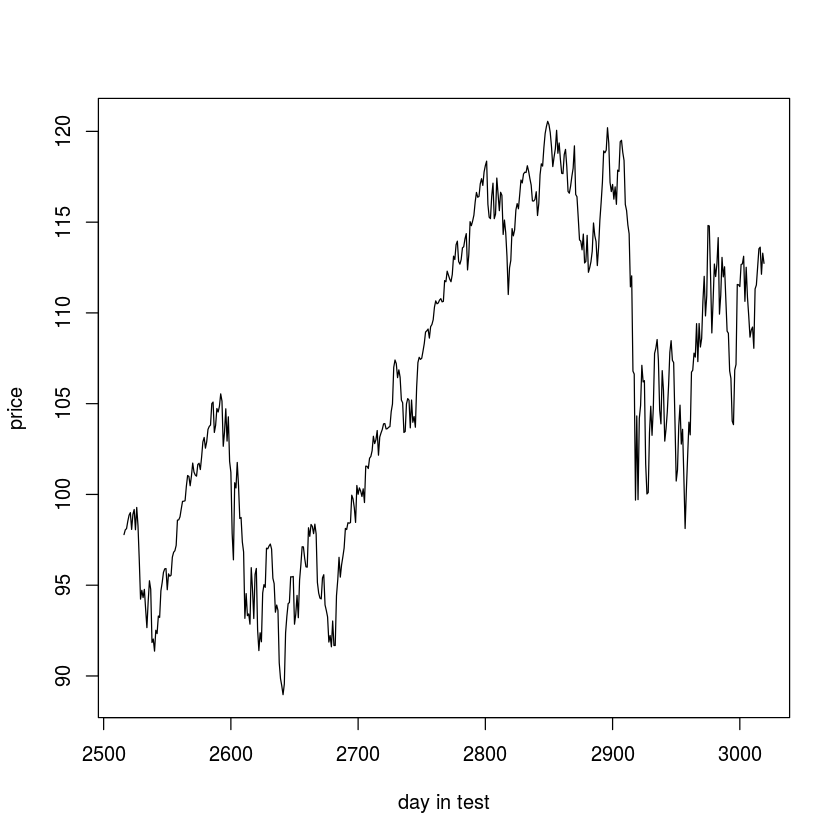

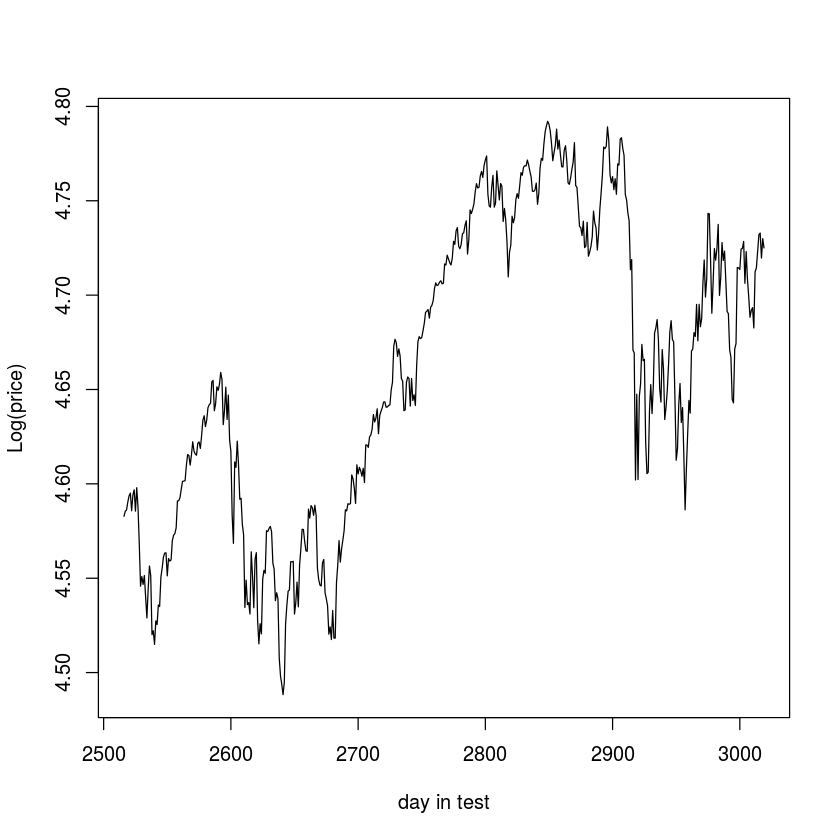

In [13]:
library(CombMSC)
library(tseries)
library(zoo)

library('forecast')


spy = get.hist.quote(instrument = "SPY", "2000-01-01", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 504

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy$test,ylab='price', xlab='day in test')
plot.ts(log(spy$test), ylab="Log(price)", xlab="day in test")

In [14]:
spy$train_log = log(spy$train)
spy$test_log = log(spy$test)


Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

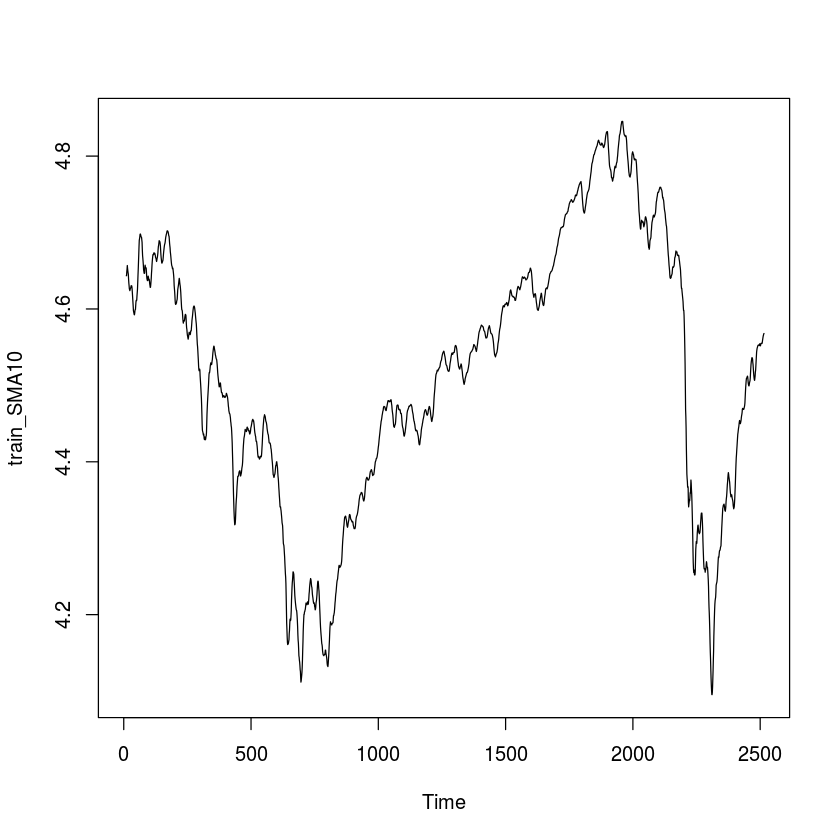

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.259978e-06,1.930755e-03,1.294691e-03,4.309951e-06,0.02900324,4.868635e-01,0.0193036,NA
Test set,1.013577e+02,1.017039e+02,1.013577e+02,9.565695e+01,95.65695416,3.811516e+04,0.9854314,73.79181


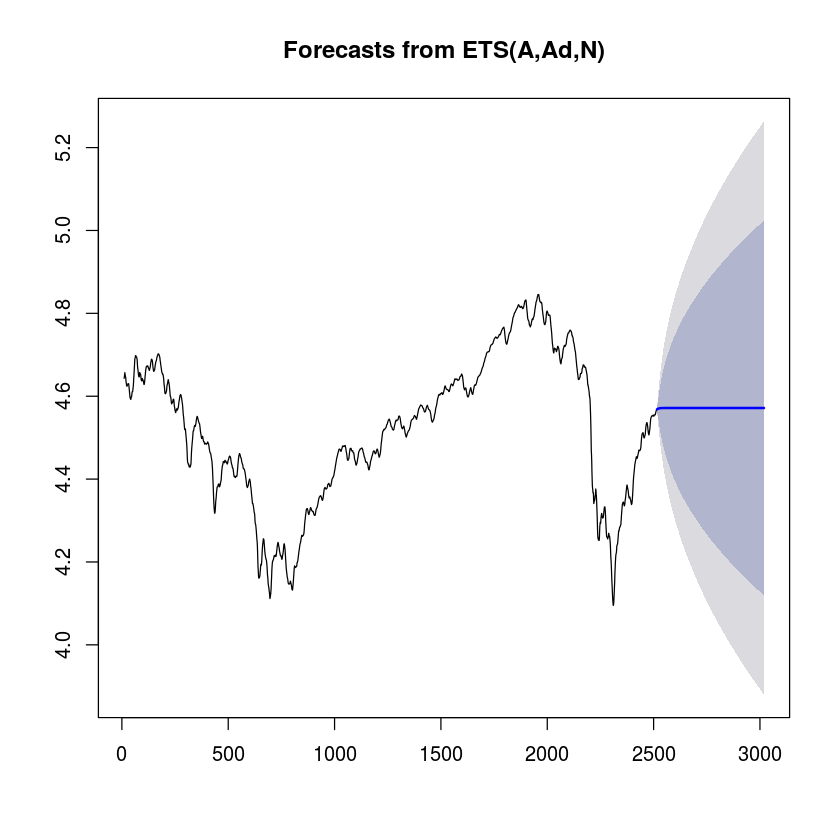

In [15]:
#install.packages('TTR')
library("TTR")


train_SMA10 <- SMA(spy$train_log,n=10)
plot.ts(train_SMA10)
SMA10_forecast <- forecast(train_SMA10, h=test_len)
plot(SMA10_forecast)
accuracy(SMA10_forecast, spy$test_log)

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

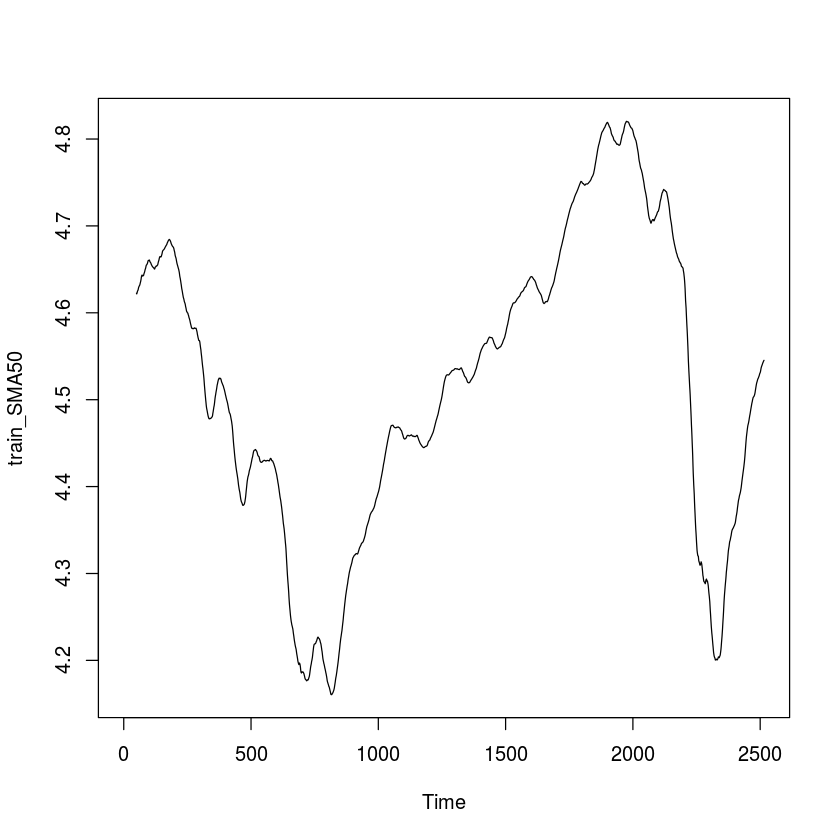

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.141214e-07,4.065283e-04,2.748377e-04,2.612794e-05,0.006142451,2.294846e-01,0.01023244,NA
Test set,1.012526e+02,1.015949e+02,1.012526e+02,9.556107e+01,95.561074400,8.454412e+04,0.98530698,73.71758


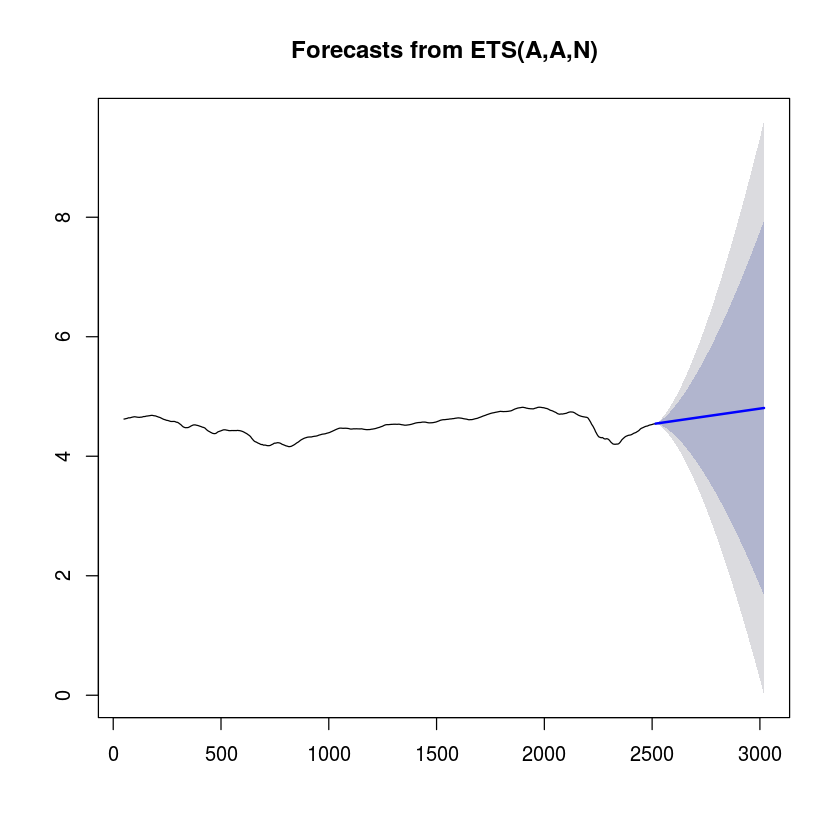

In [16]:
train_SMA50 <- SMA(spy$train_log,n=50)
plot.ts(train_SMA50)
SMA50_forecast <- forecast(train_SMA50, h=test_len)
plot(SMA50_forecast)
accuracy(SMA50_forecast, spy$test_log)

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

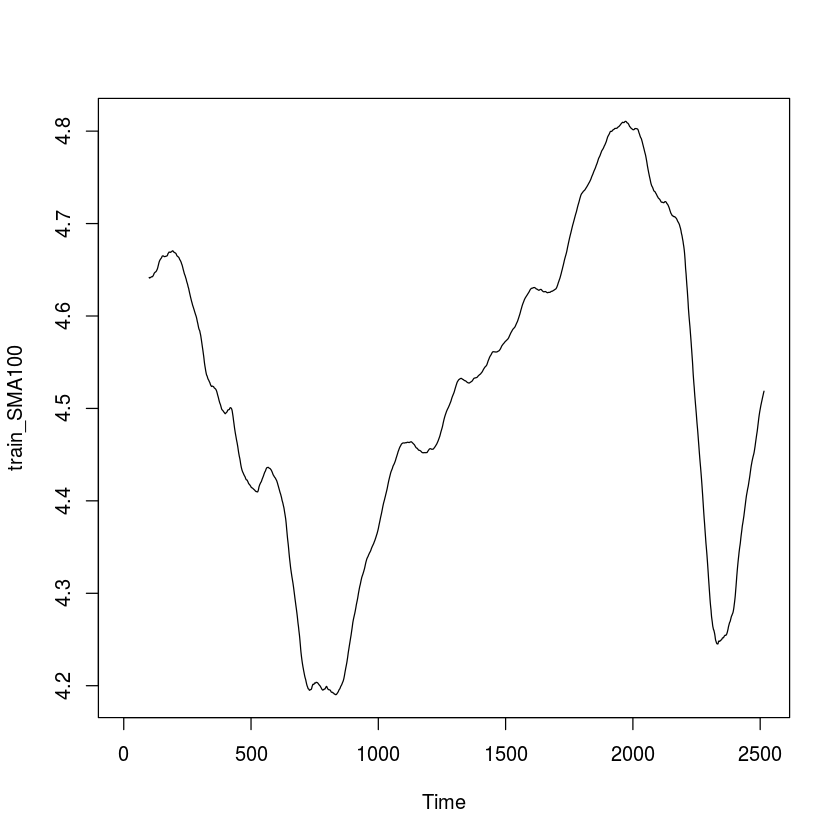

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.667851e-07,1.976102e-04,1.355049e-04,-3.950142e-06,0.003028692,1.537262e-01,0.04953011,NA
Test set,1.013622e+02,1.017080e+02,1.013622e+02,9.566166e+01,95.661664675,1.149924e+05,0.98542474,73.79536


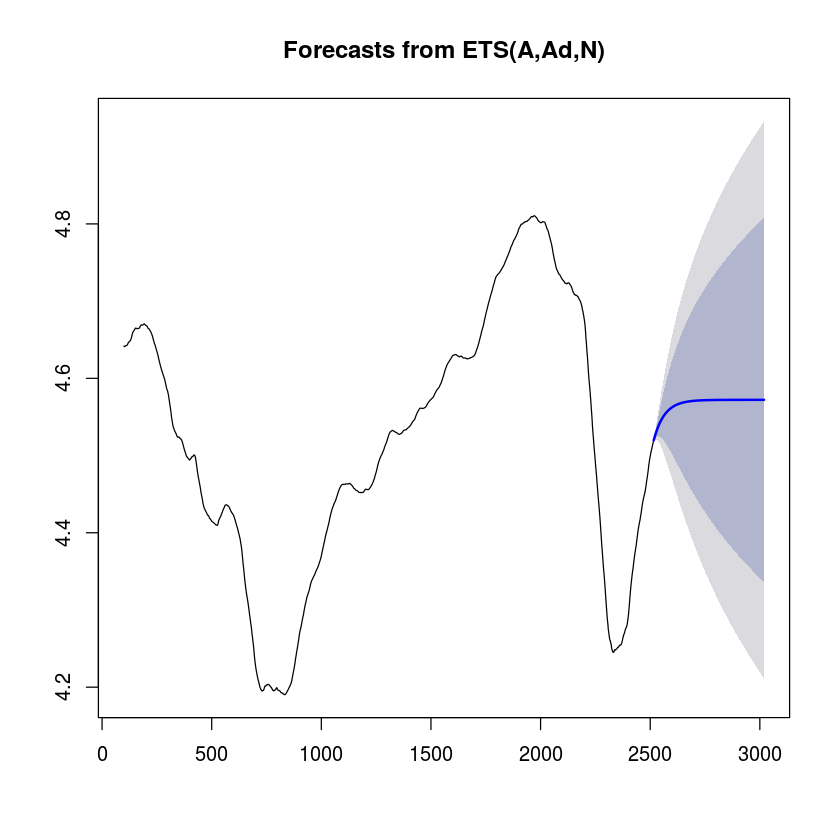

In [17]:
train_SMA100 <- SMA(spy$train_log,n=100)
plot.ts(train_SMA100)
SMA100_forecast <- forecast(train_SMA100, h=test_len)
plot(SMA100_forecast)
accuracy(SMA100_forecast, spy$test_log)

In [18]:
train_HW <- HoltWinters(spy$train_log, beta=FALSE, gamma=FALSE)
train_HW

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = spy$train_log, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9124977
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 4.566841

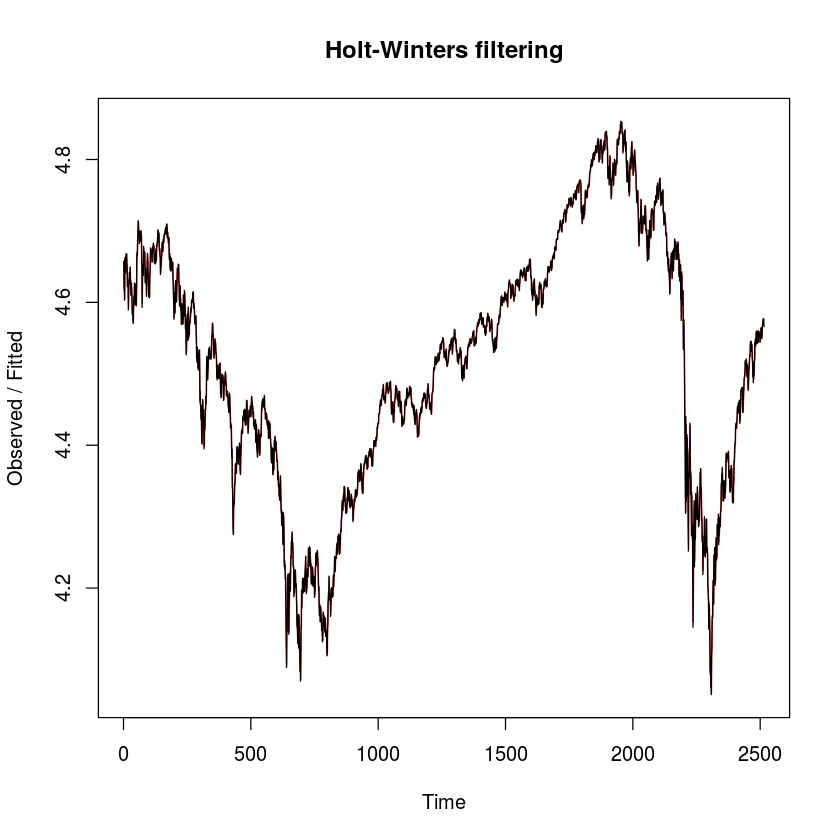

In [19]:
plot(train_HW)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-3.949726e-05,0.01407111,0.009457707,-0.001410868,0.2119937,0.999105,0.007897517,NA
Test set,9.277204e-02,0.12225888,0.101448331,1.962279073,2.1538664,10.716924,0.985111180,9.233385


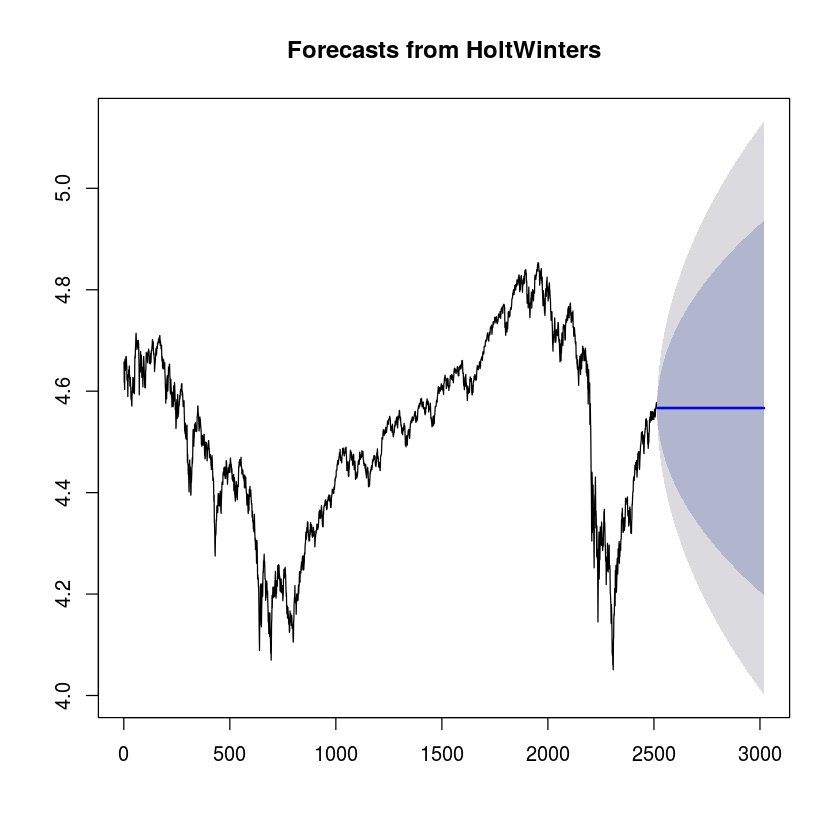

In [20]:

train_HWforecast = forecast.HoltWinters(train_HW, h=504)
plot(train_HWforecast)

accuracy(train_HWforecast, spy$test_log)